In [1]:
import os
import sys

# Get the current working directory
current_dir = os.getcwd()

# Move up two directories
grandparent_dir = os.path.abspath(os.path.join(current_dir, "../.."))

import pickle

In [2]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pylab as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 9, 6
import copy
from matplotlib import rc
rc('font',**{'family':'Arial','sans-serif':['Helvetica']})
rc('text', usetex=False)
plt.rcParams.update({'font.size': 20})

In [5]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("deep")

In [7]:
validation_stats_18k1q = pickle.load(
    open(
        os.path.join(
            grandparent_dir,
            "data",
            "IBM_char",
            "device_fit_data",
            "cairo_Standard/validation_stats_18k1nQ_512_spc_normal_mode.pickle",
        ),
        "rb",
    )
)
optimiser_stats_18k1q = pickle.load(
    open(
        os.path.join(
            grandparent_dir,
            "data",
            "IBM_char",
            "device_fit_data",
            "cairo_Standard/optmzr_18k1nQ_512_spc_normal_mode.pickle",
        ),
        "rb",
    )
)

In [27]:
validation_stats_4k4q = pickle.load(
    open(
        os.path.join(
            grandparent_dir,
            "data",
            "IBM_char",
            "device_fit_data",
            "perth_Standard/validation_stats_4k4nQ_512_spc_normal_mode.pickle",
        ),
        "rb",
    )
)
optimiser_stats_4k4q = pickle.load(
    open(
        os.path.join(
            grandparent_dir,
            "data",
            "IBM_char",
            "device_fit_data",
            "perth_Standard/optmzr_4k4nQ_512_spc_normal_mode.pickle",
        ),
        "rb",
    )
)

In [28]:
validation_stats_9k2q = pickle.load(
    open(
        os.path.join(
            grandparent_dir,
            "data",
            "IBM_char",
            "device_fit_data",
            "kolkata_Standard/validation_stats_9k2nQ_512_spc_normal_mode.pickle",
        ),
        "rb",
    )
)
optimiser_stats_9k2q = pickle.load(
    open(
        os.path.join(
            grandparent_dir,
            "data",
            "IBM_char",
            "device_fit_data",
            "kolkata_Standard/optmzr_9k2nQ_512_spc_normal_mode.pickle",
        ),
        "rb",
    )
)

In [29]:
validation_stats_6k3q = pickle.load(
    open(
        os.path.join(
            grandparent_dir,
            "data",
            "IBM_char",
            "device_fit_data",
            "perth_Standard/validation_stats_6k3nQ_512_spc_normal_mode.pickle",
        ),
        "rb",
    )
)

optimiser_stats_6k3q = pickle.load(
    open(
        os.path.join(
            grandparent_dir,
            "data",
            "IBM_char",
            "device_fit_data",
            "perth_Standard/optmzr_6k3nQ_512_spc_normal_mode.pickle",
        ),
        "rb",
    )
)

In [30]:
val_data_entropy_dict = {
    (4, 4): 0.14333119988441467,
    (18, 1): 0.28130751848220825,
    (9, 2): 0.2929145097732544,
    (6, 3): 0.2945939898490906,
}

data_entropy_dict = {
    (4, 4): 0.14520475268363953,
    (18, 1): 0.2818574607372284,
    (9, 2): 0.28555697202682495,
    (6, 3): 0.2927197217941284,
}

In [31]:
loss_dict = {
    (18, 1): optimiser_stats_18k1q[1],
    (4, 4): optimiser_stats_4k4q[1],
    (9, 2): optimiser_stats_9k2q[1],
    (6, 3): optimiser_stats_6k3q[1],
}

val_loss_dict = {
    (18, 1): optimiser_stats_18k1q[3],
    (4, 4): optimiser_stats_4k4q[3],
    (9, 2): optimiser_stats_9k2q[3],
    (6, 3): optimiser_stats_6k3q[3],
}

RF_dict = {
    (18, 1): validation_stats_18k1q[int(4e6)][1],
    (4, 4): validation_stats_4k4q[int(8e6)][1],
    (9, 2): validation_stats_9k2q[int(8e6)][1],
    (6, 3): validation_stats_6k3q[int(4e6)][1],
}

In [32]:
batch_size = 1000
nData = 300 * 50 * 2
no_batches = int(nData / 1000)

In [33]:
epoch_loss_dict = {}
epoch_val_loss_dict = {}

for key in loss_dict.keys():
    epoch_losses = [
        loss_dict[key][no_batches - 1 + no_batches * i]
        for i in range(int(len(loss_dict[key]) / no_batches))
    ]
    epoch_val_losses = [
        val_loss_dict[key][no_batches - 1 + no_batches * i]
        for i in range(int(len(val_loss_dict[key]) / no_batches))
    ]

    epoch_loss_dict[key] = epoch_losses
    epoch_val_loss_dict[key] = epoch_val_losses

In [34]:
key_list = [(18, 1), (9, 2), (6, 3), (4, 4)]

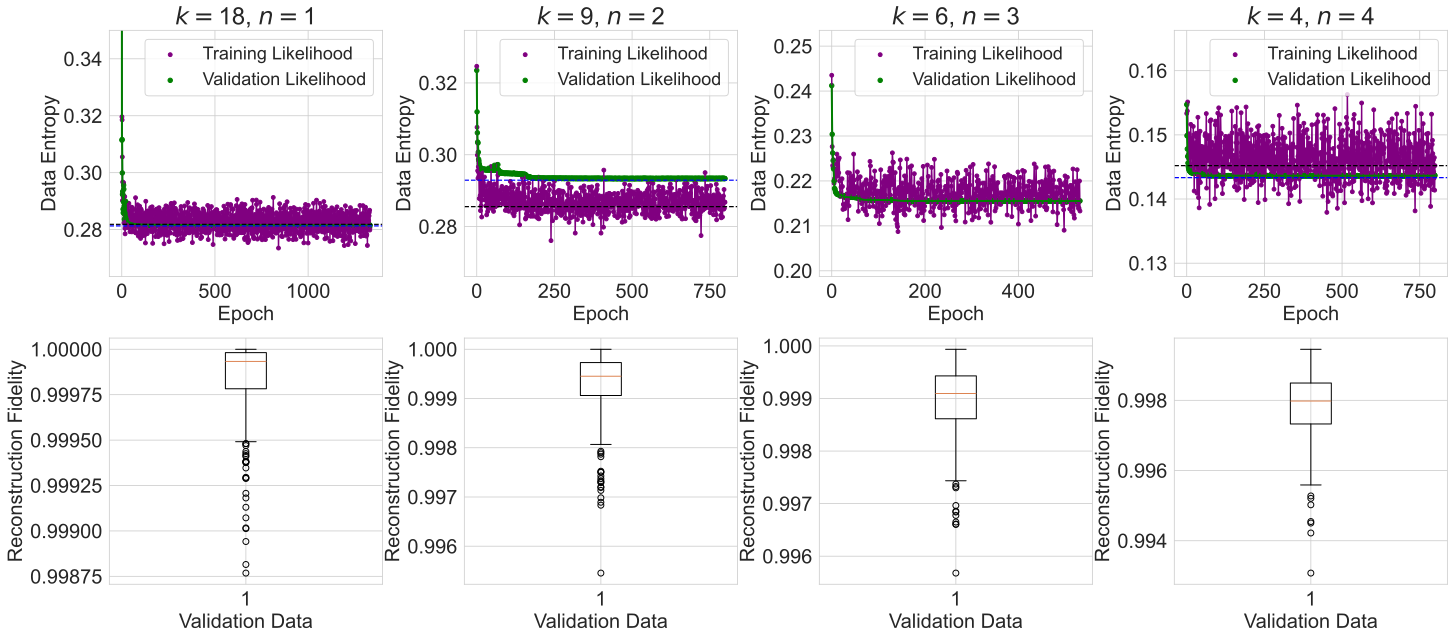

In [35]:
fig, ax = plt.subplots(2, len(key_list), figsize=(24, 10))

for i, key in enumerate(key_list):
    tmp_key = key

    ax[0, i].plot(epoch_loss_dict[tmp_key], color="purple")
    ax[0, i].plot(epoch_val_loss_dict[tmp_key], color="green", linewidth=2)
    ax[0, i].scatter(
        range(len(epoch_loss_dict[tmp_key])),
        epoch_loss_dict[tmp_key],
        s=15,
        color="purple",
        label="Training Likelihood",
    )
    ax[0, i].scatter(
        range(len(epoch_val_loss_dict[tmp_key])),
        epoch_val_loss_dict[tmp_key],
        s=20,
        color="green",
        label="Validation Likelihood",
    )
    ax[0, i].axhline(
        data_entropy_dict[tmp_key], color="black", linestyle="--", linewidth=1.25
    )
    ax[0, i].axhline(
        val_data_entropy_dict[tmp_key], color="blue", linestyle="--", linewidth=1.25
    )
    ax[0, i].set_title(f"$k = ${tmp_key[0]}, $n = ${tmp_key[1]}", fontsize=24)
    ax[0, i].set_ylabel("Data Entropy")
    ax[0, i].set_ylim(
        min(epoch_loss_dict[tmp_key]) - 0.01,
        min(max(epoch_loss_dict[tmp_key]) + 0.01, 0.35),
    )
    ax[0, i].set_xlabel("Epoch")
    ax[0, i].legend(fontsize=18)

for i, key in enumerate(key_list):
    tmp_key = key
    ax[1, i].boxplot(np.array(RF_dict[tmp_key]))
    ax[1, i].set_ylabel("Reconstruction Fidelity")
    ax[1, i].set_xlabel("Validation Data")
plt.subplots_adjust(hspace=0.25, wspace=0.3)
# plt.savefig("Tmp_TN_IBM_Benchmark.pdf", bbox_inches="tight")
plt.show()